In [33]:
import os
import pandas as pd
import re
from datetime import datetime, timedelta
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [34]:
import string
# NLTK imports
import nltk
nltk.download('punkt')
# Download stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
for word in ['covid','covid19','corona','coronavirus','corona virus','amp','face','’']:
  stop_words.add(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
processed_df = pd.read_csv('/content/drive/MyDrive/processed_labeled_data.csv')
processed_df.head()

ParserError: ignored

In [ ]:
processed_df.info()

#### Label Data

In [6]:
import os
import pandas as pd
import re
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import *
from keras.layers import *
from keras.callbacks import *

In [7]:
p_df = processed_df.dropna(subset=['pr_text_swr_lemma'])

In [8]:
le = pickle.load(open('/content/drive/MyDrive/finalized_model_encoder.sav', 'rb'))

In [9]:
cv_tensor = pickle.load(open('/content/drive/MyDrive/finalized_model_cv_tensor.sav', 'rb'))

In [10]:
def convert_sparse_matrix_to_tensor(X):
    return tf.convert_to_tensor(X.toarray())

In [11]:
reconstructed_model=tf.keras.models.load_model ("/content/drive/MyDrive/Basic_NN_Model2.h5")

In [12]:
p_df['label'] = le.inverse_transform(np.argmax(reconstructed_model.predict(cv_tensor.transform(p_df.pr_text_swr_lemma)), axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931850 entries, 0 to 932729
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Tweet Id           931850 non-null  object
 1   sentiment          364541 non-null  object
 2   country            364541 non-null  object
 3   Datetime           931850 non-null  object
 4   Username           931849 non-null  object
 5   text               931850 non-null  object
 6   text_ett           931850 non-null  object
 7   pr_text            931850 non-null  object
 8   pr_text_swr        931850 non-null  object
 9   pr_text_swr_lemma  931850 non-null  object
 10  label              931850 non-null  object
dtypes: object(11)
memory usage: 85.3+ MB


In [14]:
p_df.head()

Tweet Id sentiment country             Datetime        Username  \
0  1215249537834442753       NaN     NaN  2020-01-09 12:30:42        MackayIM   
1  1215076140412366848       NaN     NaN  2020-01-09 01:01:41    GlenwoodNate   
2  1217191264858206209       NaN     NaN  2020-01-14 21:06:26  HelenBranswell   
3  1217063853894307842       NaN     NaN  2020-01-14 12:40:09   BioMickWatson   
4  1217806193185288193       NaN     NaN  2020-01-16 13:49:56        MackayIM   

                                                text  \
0  for those who take seriously a blatantly light...   
1  the virus circulating in china now has been de...   
2  1. a thread on @who's update today on the case...   
3  dismayed that novel coronavirus has been calle...   
4  have we seen any cases of pneumonia or respira...   

                                            text_ett  \
0  for those who take seriously a blatantly light...   
1  the virus circulating in china now has been de...   
2  1. a thread on @who's update today on the case...   
3  dismayed that novel coronavirus has been calle...   
4  have we seen any cases of pneumonia or respira...   

                                             pr_text  \
0  for those who take seriously blatantly lighthe...   
1  the virus circulating in china now has been de...   
2  1 thread on update today on the case of novel ...   
3  dismayed that novel coronavirus has been calle...   
4  have we seen any cases of pneumonia or respira...   

                                         pr_text_swr  \
0  take seriously blatantly lighthearted thread n...   
1  virus circulating china described novel much l...   
2  1 thread update today case novel infection det...   
3                   dismayed novel called novel ncov   
4  seen cases pneumonia respiratory illness assoc...   

                                   pr_text_swr_lemma     label  
0  take seriously blatantly lighthearted thread n...  Negative  
1  virus circulating china described novel much l...  Negative  
2  1 thread update today case novel infection det...  Negative  
3                   dismayed novel called novel ncov   Neutral  
4  seen case pneumonia respiratory illness associ...  Negative

In [15]:
p_df.label.value_counts()

Negative    708831
Positive    183286
Neutral      39733
Name: label, dtype: int64

In [ ]:
p_df['labeled_by'] = 'Basic NN'

In [21]:
p_df['Datetime']=p_df.Datetime.apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
p_df.to_csv('/content/drive/MyDrive/labeled_data_NN.csv', index=False)

In [35]:
cv= pickle.load(open('/content/drive/MyDrive/finalized_model_cv1_08.sav', 'rb'))
loaded_model = pickle.load(open('/content/drive/MyDrive/finalized_model_mnb_08.sav', 'rb'))

p_df['label_MNB'] = loaded_model.predict(cv.transform(p_df.pr_text_swr_lemma))

replacement_mapping_dict = {
    0 : "Negative",
    1 : "Neutral",
    2 : "Positive"
}

p_df['label_MNB'] = p_df['label_MNB'].replace(replacement_mapping_dict)

In [36]:
p_df.columns.values

array(['Tweet Id', 'sentiment', 'country', 'Datetime', 'Username', 'text',
       'text_ett', 'pr_text', 'pr_text_swr', 'pr_text_swr_lemma', 'label',
       'label_MNB'], dtype=object)

In [37]:
p_df[['Tweet Id', 'sentiment', 'country', 'Datetime', 'Username', 'text',
       'text_ett', 'pr_text', 'pr_text_swr', 'pr_text_swr_lemma', 'label_MNB']].to_csv('/content/drive/MyDrive/labeled_data_MNB.csv', index=False)

In [38]:
p_df[['sentiment','label_MNB']].value_counts()

sentiment  label_MNB
Negative   Negative     175078
Positive   Positive      46708
Negative   Neutral       43145
           Positive      24612
Neutral    Neutral       19238
Positive   Neutral       17308
Neutral    Negative      14380
           Positive      12552
Positive   Negative      11520
dtype: int64

In [39]:
p_df[['sentiment','label']].value_counts()

sentiment  label   
Negative   Negative    232192
Positive   Positive     57298
Neutral    Negative     24816
Positive   Negative     14951
Neutral    Neutral      11476
           Positive      9878
Negative   Positive      7353
           Neutral       3290
Positive   Neutral       3287
dtype: int64

#### WordCloud

In [37]:
p_df = pd.read_csv('/content/drive/MyDrive/labeled_data_MNB.csv')

In [ ]:
# p_df[['Tweet Id','country','Datetime','pr_text_swr_lemma']]('/content/drive/MyDrive/tableau_dataset.csv', index=False)

In [40]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931850 entries, 0 to 931849
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Tweet Id           931850 non-null  int64         
 1   sentiment          364541 non-null  object        
 2   country            364541 non-null  object        
 3   Datetime           931850 non-null  datetime64[ns]
 4   Username           931849 non-null  object        
 5   text               931850 non-null  object        
 6   text_ett           931850 non-null  object        
 7   pr_text            931850 non-null  object        
 8   pr_text_swr        931850 non-null  object        
 9   pr_text_swr_lemma  931850 non-null  object        
 10  label_MNB          931850 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 78.2+ MB


In [39]:
p_df['Datetime']=p_df.Datetime.apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [6]:
def wordcloud(string,title,color):
    wc = WordCloud(background_color=color, width=1200,height=600,mask=None,random_state=1,
                   max_font_size=200,stopwords=stop_words,collocations=False,repeat = False).generate(string)
    fig=plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.title('--- WordCloud for {} --- '.format(title),weight='bold', size=30)
    plt.imshow(wc)

Yearly word clouds

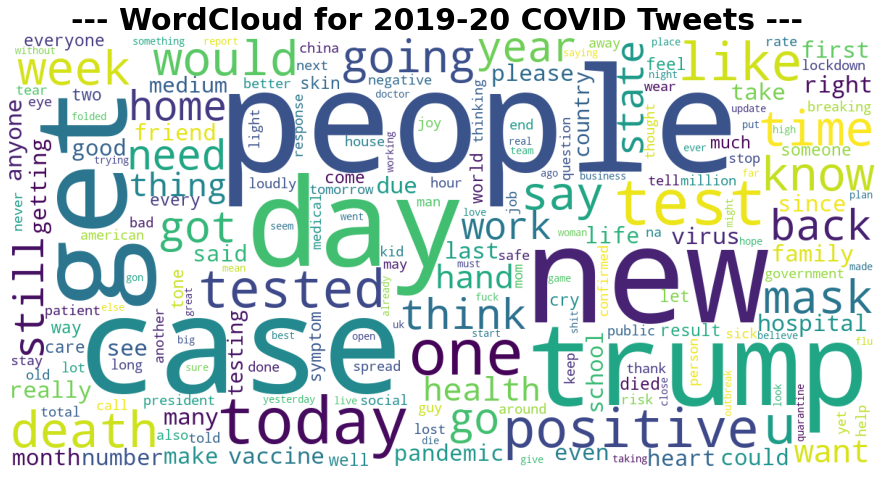

In [9]:
source_string = " ".join(p_df[p_df.Datetime.lt(datetime.strptime('2021-01-01','%Y-%m-%d'))]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2019-20 COVID Tweets','white')

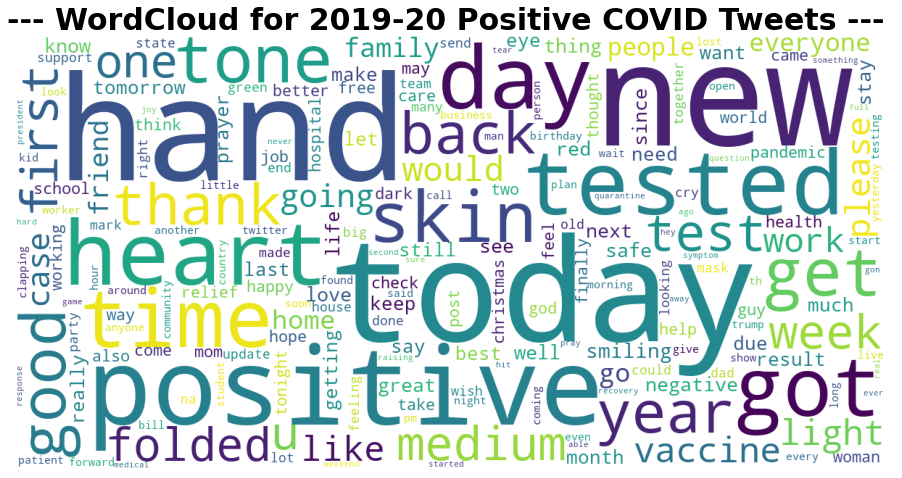

In [12]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2021-01-01','%Y-%m-%d')))&(p_df.label_MNB=='Positive')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2019-20 Positive COVID Tweets','white')

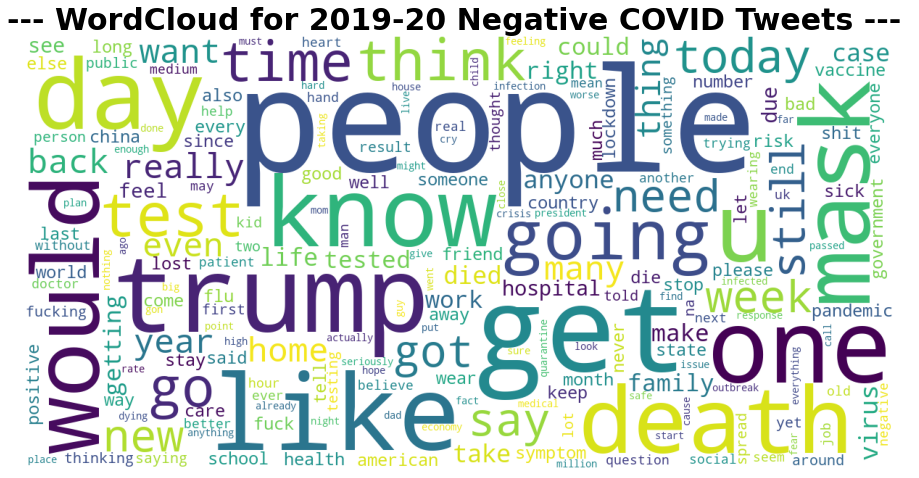

In [13]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2021-01-01','%Y-%m-%d')))&(p_df.label_MNB=='Negative')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2019-20 Negative COVID Tweets','white')

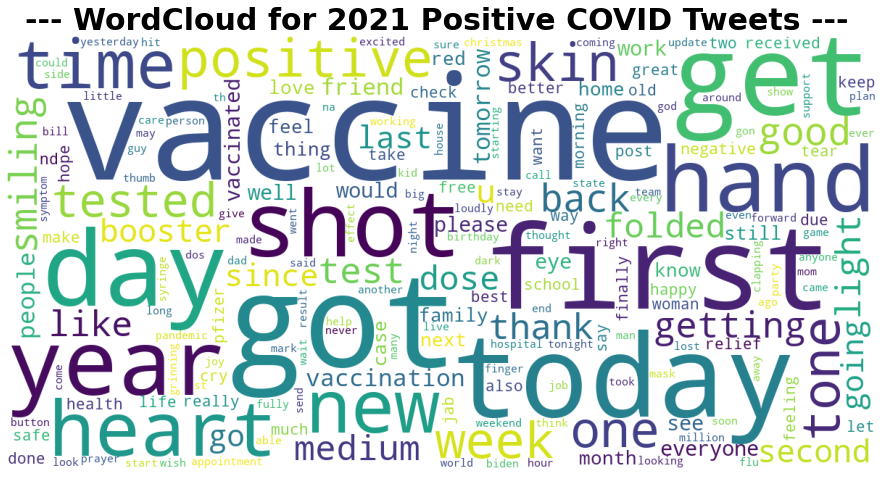

In [14]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2022-01-01','%Y-%m-%d'))&p_df.Datetime.gt(datetime.strptime('2020-12-31','%Y-%m-%d')))&(p_df.label_MNB=='Positive')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2021 Positive COVID Tweets','white')

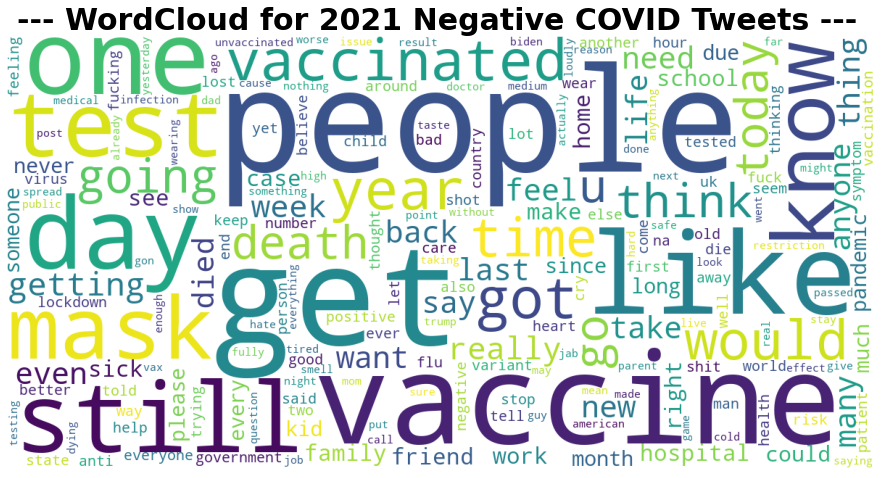

In [15]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2022-01-01','%Y-%m-%d'))&p_df.Datetime.gt(datetime.strptime('2020-12-31','%Y-%m-%d')))&(p_df.label_MNB=='Negative')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2021 Negative COVID Tweets','white')

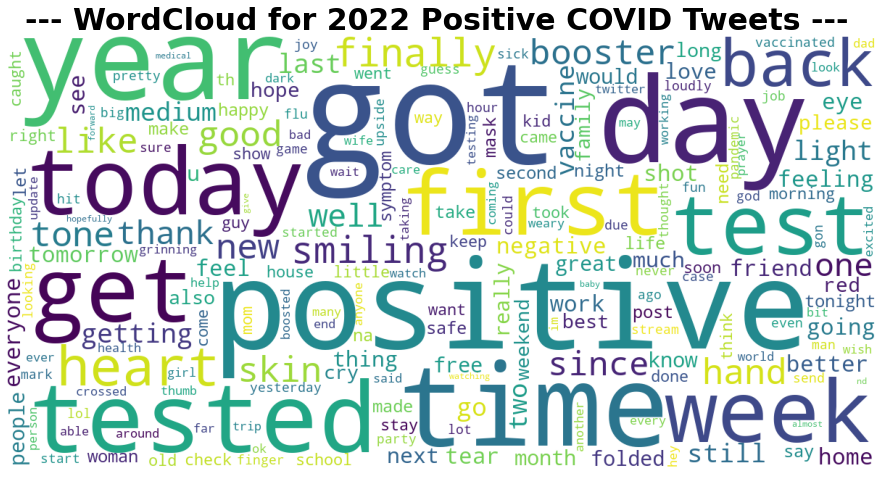

In [16]:
source_string = " ".join(p_df[(p_df.Datetime.gt(datetime.strptime('2021-12-31','%Y-%m-%d')))&(p_df.label_MNB=='Positive')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2022 Positive COVID Tweets','white')

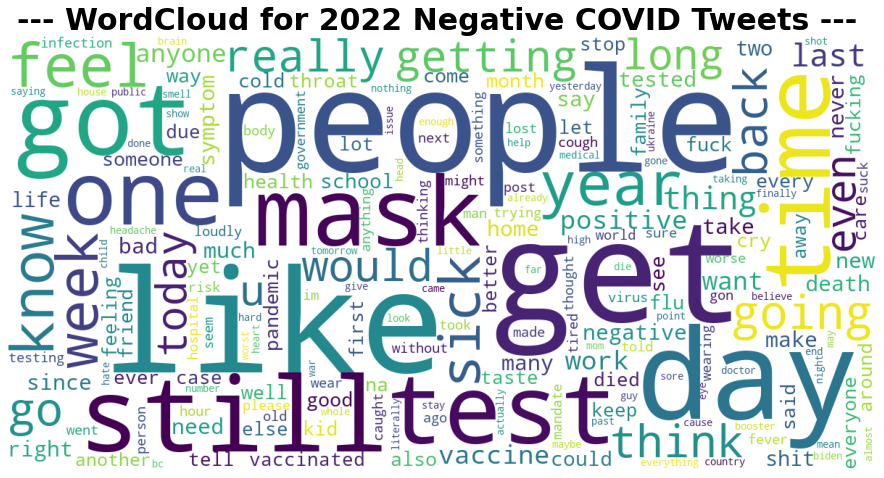

In [17]:
source_string = " ".join(p_df[(p_df.Datetime.gt(datetime.strptime('2021-12-31','%Y-%m-%d')))&(p_df.label_MNB=='Negative')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2022 Negative COVID Tweets','white')

#### Country-Yearly Tweets

India

2019-2020

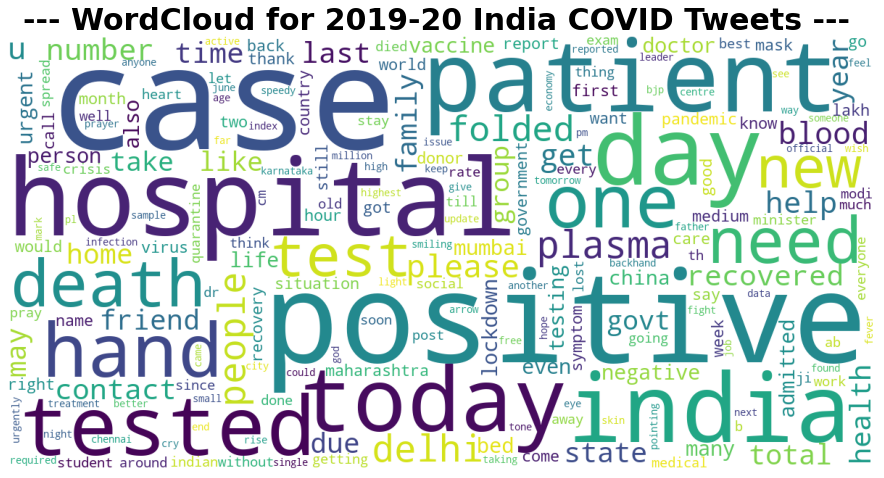

In [18]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2021-01-01','%Y-%m-%d')))&(p_df.country=='India')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2019-20 India COVID Tweets','white')

2021

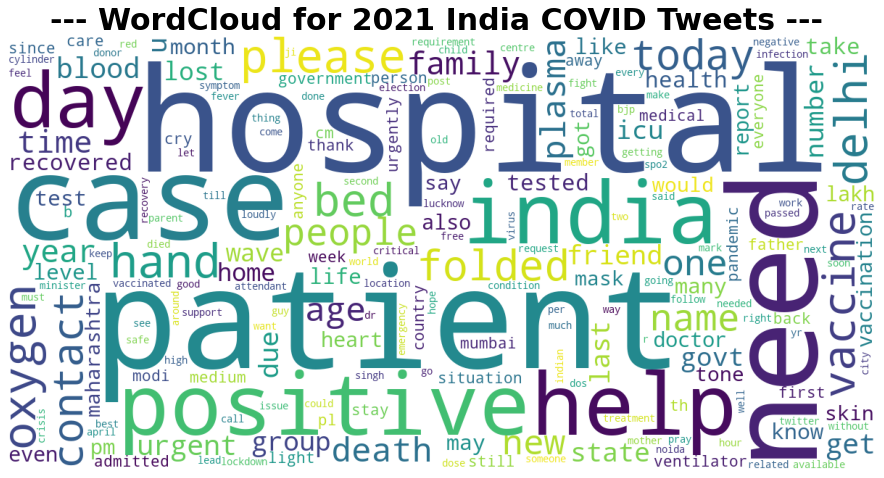

In [19]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2022-01-01','%Y-%m-%d'))&p_df.Datetime.gt(datetime.strptime('2020-12-31','%Y-%m-%d')))&(p_df.country=='India')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2021 India COVID Tweets','white')

2022

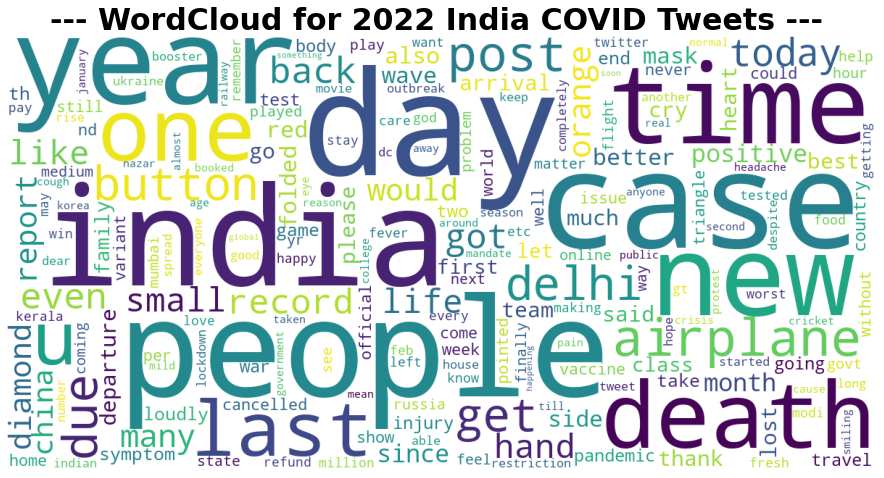

In [20]:
source_string = " ".join(p_df[(p_df.Datetime.gt(datetime.strptime('2021-12-31','%Y-%m-%d')))&(p_df.country=='India')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2022 India COVID Tweets','white')

US

2019-2020

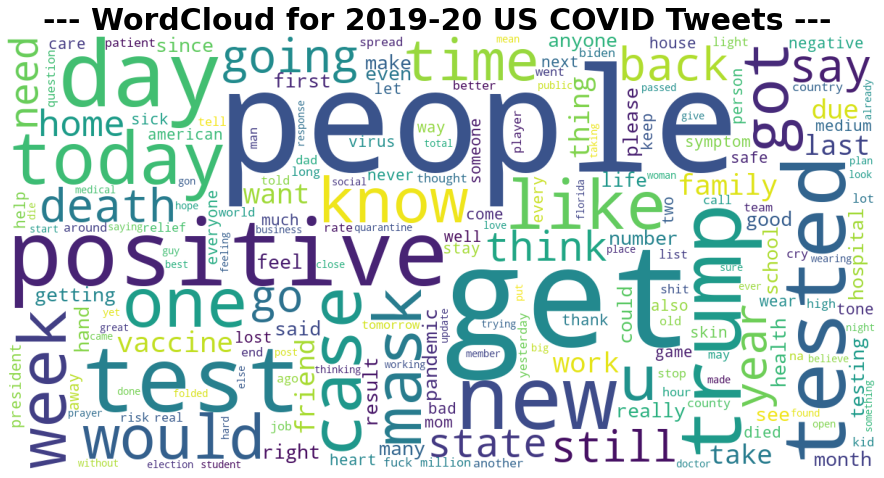

In [21]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2021-01-01','%Y-%m-%d')))&(p_df.country=='United States')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2019-20 US COVID Tweets','white')

2021

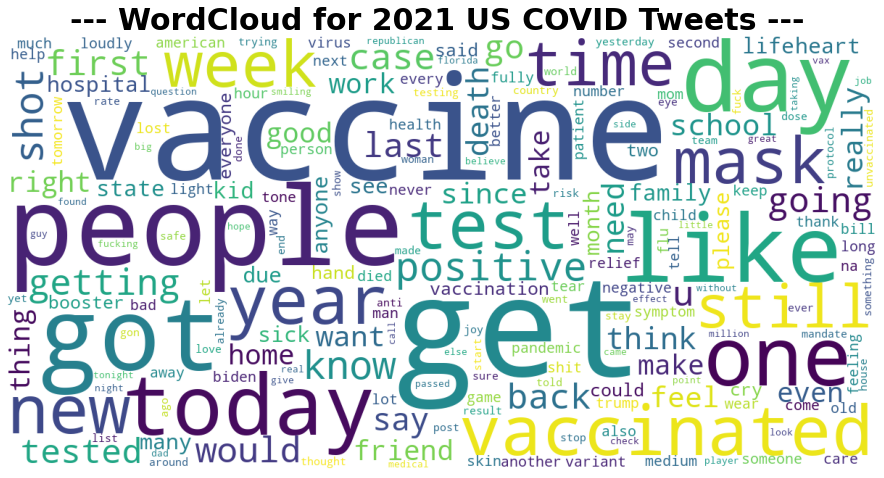

In [22]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2022-01-01','%Y-%m-%d'))&p_df.Datetime.gt(datetime.strptime('2020-12-31','%Y-%m-%d')))&(p_df.country=='United States')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2021 US COVID Tweets','white')

2022

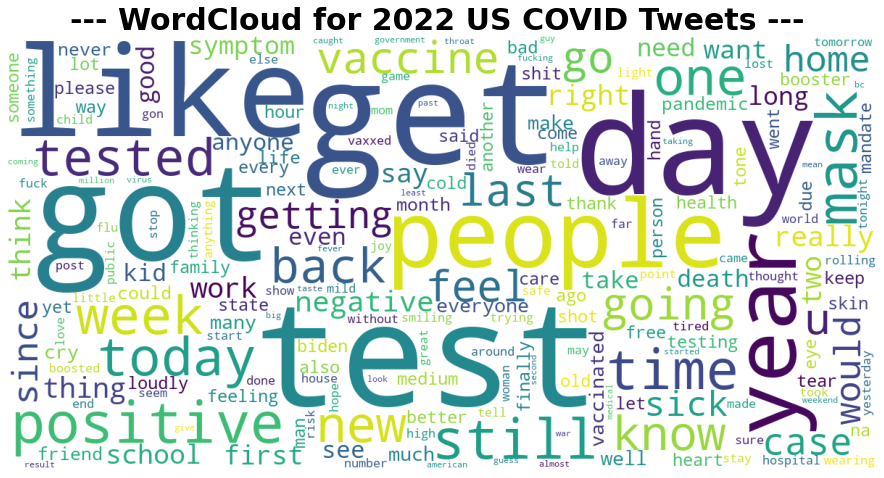

In [23]:
source_string = " ".join(p_df[(p_df.Datetime.gt(datetime.strptime('2021-12-31','%Y-%m-%d')))&(p_df.country=='United States')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2022 US COVID Tweets','white')

UK

2019-2020

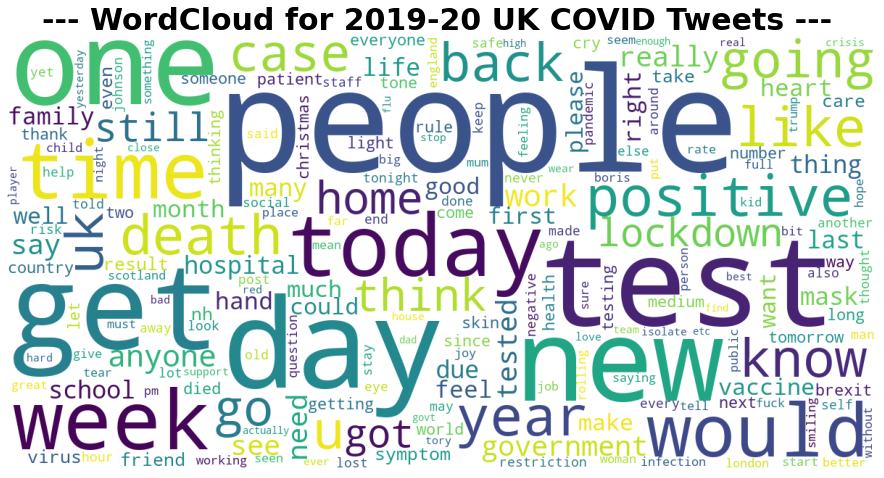

In [24]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2021-01-01','%Y-%m-%d')))&(p_df.country=='United Kingdom')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2019-20 UK COVID Tweets','white')

2021

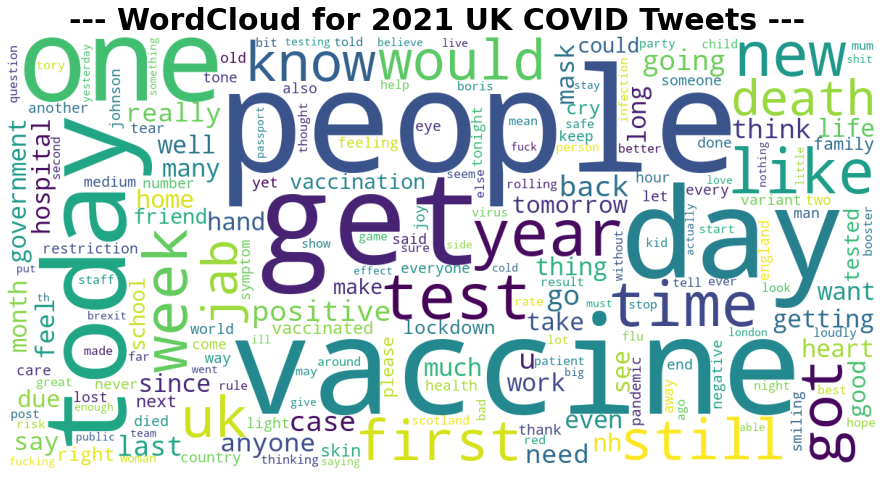

In [25]:
source_string = " ".join(p_df[(p_df.Datetime.lt(datetime.strptime('2022-01-01','%Y-%m-%d'))&p_df.Datetime.gt(datetime.strptime('2020-12-31','%Y-%m-%d')))&(p_df.country=='United Kingdom')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2021 UK COVID Tweets','white')

2022

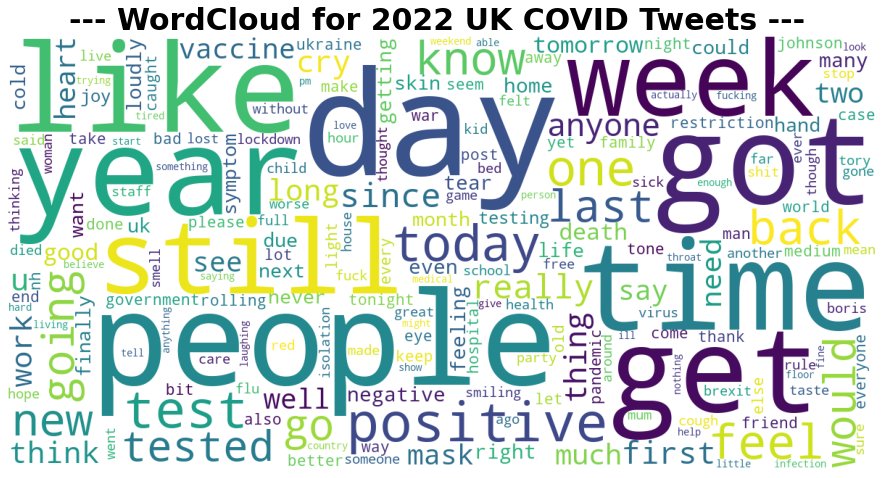

In [26]:
source_string = " ".join(p_df[(p_df.Datetime.gt(datetime.strptime('2021-12-31','%Y-%m-%d')))&(p_df.country=='United Kingdom')]['pr_text_swr_lemma'].astype('str'))
wordcloud(source_string,'2022 UK COVID Tweets','white')

In [51]:
p_df['month_year'] = p_df.Datetime.apply(lambda x:datetime.strftime(x,'%Y-%m'))

In [58]:
p_df.groupby(by=['country','month_year','label_MNB']).count()['text'].reset_index()

country month_year label_MNB  text
0     Argentina    2020-04  Negative     1
1     Argentina    2020-05  Negative     2
2     Argentina    2020-05  Positive     1
3     Argentina    2020-06  Negative     1
4     Argentina    2020-06   Neutral     2
...         ...        ...       ...   ...
2104    Vietnam    2022-02  Negative     1
2105    Vietnam    2022-02  Positive     1
2106    Vietnam    2022-03  Negative     1
2107    Vietnam    2022-03  Positive     1
2108    Vietnam    2022-04  Negative     1

[2109 rows x 4 columns]

In [75]:
import itertools

In [82]:
p_nna = p_df.dropna()

In [83]:
p_nna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364541 entries, 3214 to 931829
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Tweet Id           364541 non-null  int64         
 1   sentiment          364541 non-null  object        
 2   country            364541 non-null  object        
 3   Datetime           364541 non-null  datetime64[ns]
 4   Username           364541 non-null  object        
 5   text               364541 non-null  object        
 6   text_ett           364541 non-null  object        
 7   pr_text            364541 non-null  object        
 8   pr_text_swr        364541 non-null  object        
 9   pr_text_swr_lemma  364541 non-null  object        
 10  label_MNB          364541 non-null  object        
 11  month_year         364541 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 36.2+ MB


In [84]:
null_df = pd.DataFrame(list(itertools.product(p_nna.country.unique(), p_nna.month_year.unique(), p_nna.label_MNB.unique(),[0])))

In [85]:
null_df

0        1         2  3
0     United States  2020-01  Negative  0
1     United States  2020-01   Neutral  0
2     United States  2020-01  Positive  0
3     United States  2020-02  Negative  0
4     United States  2020-02   Neutral  0
...             ...      ...       ... ..
2695       Colombia  2021-04   Neutral  0
2696       Colombia  2021-04  Positive  0
2697       Colombia  2021-05  Negative  0
2698       Colombia  2021-05   Neutral  0
2699       Colombia  2021-05  Positive  0

[2700 rows x 4 columns]

In [86]:
null_df.columns = ['country','month_year','label_MNB','text_count']
null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     2700 non-null   object
 1   month_year  2700 non-null   object
 2   label_MNB   2700 non-null   object
 3   text_count  2700 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 84.5+ KB


In [104]:
vsum = pd.merge(p_nna.groupby(by=['country','month_year','label_MNB']).count()['text'].reset_index(),null_df,on=['country','month_year','label_MNB'],how='right')
vsum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     2700 non-null   object 
 1   month_year  2700 non-null   object 
 2   label_MNB   2700 non-null   object 
 3   text        2109 non-null   float64
 4   text_count  2700 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 126.6+ KB


In [107]:
vsum['text_count'] = vsum.text.fillna(value=0)

In [114]:
vsum = vsum.sort_values(by=['country','month_year','label_MNB'])
vsum = vsum.reset_index(drop=True)
vsum

country month_year label_MNB  text  text_count
0     Argentina    2020-01  Negative   NaN         0.0
1     Argentina    2020-01   Neutral   NaN         0.0
2     Argentina    2020-01  Positive   NaN         0.0
3     Argentina    2020-02  Negative   NaN         0.0
4     Argentina    2020-02   Neutral   NaN         0.0
...         ...        ...       ...   ...         ...
2695    Vietnam    2022-05   Neutral   NaN         0.0
2696    Vietnam    2022-05  Positive   NaN         0.0
2697    Vietnam    2022-06  Negative   NaN         0.0
2698    Vietnam    2022-06   Neutral   NaN         0.0
2699    Vietnam    2022-06  Positive   NaN         0.0

[2700 rows x 5 columns]

In [135]:
csum = pd.merge(vsum[['country','month_year','label_MNB','text']],vsum.drop(columns=['text']).groupby(by=['country','label_MNB']).cumsum(),left_index=True,right_index=True)
csum['text'] = csum.text.fillna(value=0)

In [136]:
csum[(csum.country=='Vietnam')&(csum.label_MNB=='Negative')]

country month_year label_MNB  text  text_count
2610  Vietnam    2020-01  Negative   1.0         1.0
2613  Vietnam    2020-02  Negative   0.0         1.0
2616  Vietnam    2020-03  Negative   0.0         1.0
2619  Vietnam    2020-04  Negative   1.0         2.0
2622  Vietnam    2020-05  Negative   0.0         2.0
2625  Vietnam    2020-06  Negative   1.0         3.0
2628  Vietnam    2020-07  Negative   0.0         3.0
2631  Vietnam    2020-08  Negative   0.0         3.0
2634  Vietnam    2020-09  Negative   3.0         6.0
2637  Vietnam    2020-10  Negative   0.0         6.0
2640  Vietnam    2020-11  Negative   0.0         6.0
2643  Vietnam    2020-12  Negative   0.0         6.0
2646  Vietnam    2021-01  Negative   0.0         6.0
2649  Vietnam    2021-02  Negative   1.0         7.0
2652  Vietnam    2021-03  Negative   1.0         8.0
2655  Vietnam    2021-04  Negative   0.0         8.0
2658  Vietnam    2021-05  Negative   4.0        12.0
2661  Vietnam    2021-06  Negative   2.0        14.0
2664  Vietnam    2021-07  Negative   0.0        14.0
2667  Vietnam    2021-08  Negative   0.0        14.0
2670  Vietnam    2021-09  Negative   2.0        16.0
2673  Vietnam    2021-10  Negative   0.0        16.0
2676  Vietnam    2021-11  Negative   1.0        17.0
2679  Vietnam    2021-12  Negative   0.0        17.0
2682  Vietnam    2022-01  Negative   0.0        17.0
2685  Vietnam    2022-02  Negative   1.0        18.0
2688  Vietnam    2022-03  Negative   1.0        19.0
2691  Vietnam    2022-04  Negative   1.0        20.0
2694  Vietnam    2022-05  Negative   0.0        20.0
2697  Vietnam    2022-06  Negative   0.0        20.0

In [137]:
csum.to_csv('/content/drive/MyDrive/tableau_csum.csv', index=False)